** Xiangyi Cheng (xxc283)**

# Introduction and Background

Intubation is one of the most common procedures performed worldwide in emergency departments which requires high skill. It’s performed by inserting a plastic tube into the trachea to maintain an open airway of a patient. This intubation procedure often involves complications due to invisible glottis where is the tube must be inserted.  Therefore, device that can lead automated intubation is needed urgently to bring breakthrough in many emergency situations. In my research, IntuBot, a prototype of robotic intubation device, was developed to fill in this need. Currently, the hardware of IntuBot was fully assembled while the algorithm is still at the starting point. As an automated intubation device, IntuBot should be able to accurately detect the vocal cords which are the entrance of the airway. Plastic tube will be pushed into the patients’ airway by motors based on this detection. 

To detect the vocal cords with high accuracy, a large and reliable database contained vocal cords will be needed. Although there exists amount of vocal cords images online, self-built database is still needed since at least thousands of images are missing. The self-built database will be established by modifying then adding to the existing images. After obtaining the database, object detection using Haar feature-based cascade classifier in OpenCV will be applied. 

Cascading is a case of ensemble learning using all information collected from the output of a classifier as additional information for the next cassifier in the cascade. Cascading Classifier are trained by importing amount of positive images which contains the target objects in different views and negative images without that objects in the same size into the computer. After it is trained, the classifier can be used to detect that object from a region of an image. Haar feature-based cascade classifier was first come up by Viola, Paul and Michael Jones in 2001. A simple rectangular Haar-like feature can be defined as the difference of the sum of pixels of areas inside the rectangle, which can be at any position and scale within the original image, as shown below. The obvious advantage of a haar-like feature over other features is the fast computation speed. Therefore, haar-like features are proper to be used in real-time detection. 
![Haar like features](haar.png)

After cascade classifier is trained,  the classifier will be implemented to detect the vocal cords on a series of images for testing. The results will be evaluated. 

# Image Pre-processing and Data Preparation

In [2]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

def convert_pos():
    pic_num=1
    for img in os.listdir('vc_training/raw_images/pos_target'):
        try:
            img=cv2.imread('vc_training/raw_images/pos_target/'+str(img),cv2.IMREAD_GRAYSCALE)
            resized_img=cv2.resize(img,(50,50))
            cv2.imwrite('vc_training/pos5050/'+str(pic_num)+'.jpg',resized_img)
            pic_num+=1
        except Exception as e:
            print str(e)
            
            
def convert_neg():
    pic_num=1173
    for img in os.listdir('vc_training/neg'):
        try:
            img=cv2.imread('vc_training/neg/'+str(img),cv2.IMREAD_GRAYSCALE)
            resized_img=cv2.resize(img,(50,50))
            cv2.imwrite('vc_training/neg/'+str(pic_num)+'.jpg',resized_img)
            pic_num+=1
        except Exception as e:
            print str(e)
            
convert_pos()
convert_neg()

In [12]:
def randomly_select_test_image():
    image_list=os.listdir('vc_training/raw_images/Closed_vocal_cord_Expansion')
    #image_list=os.listdir('vc_training/raw_images/Open_vocal_cord')
    select_num=74
    select_image=random.sample(image_list,select_num)
    test_image_num=27
    if not os.path.exists('test'):
        os.makedirs('test')
    if not os.path.exists('test_resized'):
        os.makedirs('test_resized')
    for i in range (0,select_num):
        try:
            #pre_name= 'vc_training/raw_images/Open_vocal_cord/'+ str(select_image[i])
            pre_name='vc_training/raw_images/Closed_vocal_cord_Expansion/'+str(select_image[i])
            new_name='vc_training/test_pos_img/'+str(test_image_num)+'.jpg'

            os.rename(pre_name,new_name)
            #raw_test_image=cv2.imread('test/'+str(test_image_num)+'.jpg')
            #resized_image=cv2.resize(raw_test_image,(50,50))
            #cv2.imwrite('test1/'+str(test_image_num)+'.jpg',raw_test_image)
            test_image_num+=1
        except Exception as e:
            print str(e)
            
randomly_select_test_image()

# Classifier Training with Haar-like Features

In [13]:
def create_neg_description_files_modified():
    for img in os.listdir('vc_training/neg'):
        line= 'vc_training/neg/'+img+'\n'
        open('vc_training/bg.txt','a').write(line)

def create_pos_description_files():
    for img in os.listdir,img('vc_training/pos5050'):
        line = img + ' 1 0 0 50 50\n'
        #print line
        open('vc_training/info.dat','a').write(line)
         

        
create_neg_description_files_modified()
create_pos_description_files()

# Detection Testing

X coordinate: 92
Y coordinate: 89
Width: 50
Height: 50


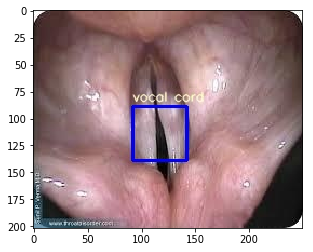

In [4]:
def detect_vocal_cord_from_image():
    vocal_cord_cascade=cv2.CascadeClassifier('vc_training/cascade_10_stage5050.xml')
    img_path= 'vc_training/test_pos_img/8.jpg'
    img=cv2.imread(img_path)
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    vocal_cord=vocal_cord_cascade.detectMultiScale(gray_img,5,60)
    for (x,y,w,h) in vocal_cord:
        print 'X coordinate:', x
        print 'Y coordinate:', y
        print 'Width:', w
        print 'Height:',h
        
        # the image to draw, starting point, ending point, color, line thickness.
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) 
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'vocal cord',(x,y-5),font,0.4,(200,255,255),1,cv2.LINE_AA)
    
    cv2.imwrite('result/vocal_cord_detection.jpg',img)
    img1=mping.imread('result/vocal_cord_detection.jpg')
    plt.imshow(img1)
    plt.show()
    cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
detect_vocal_cord_from_image()

In [15]:
def detect_vocal_cord_from_folder():
    vocal_cord_cascade=cv2.CascadeClassifier('vc_training/cascade_14_stage5050.xml')

    scale_factor=10
    min_neighbors=60

    for img in os.listdir('examples1'):
        img1= cv2.imread('examples1/'+str(img))
        cv2.imshow('1',img1)
        gray_img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        vocal_cord=vocal_cord_cascade.detectMultiScale(img1,scale_factor,min_neighbors)
       
        for (x,y,w,h) in vocal_cord:
            cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)

            font=cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img1,'vocal cord',(x,y-5),font,0.4,(200,255,255),1,cv2.LINE_AA)
            
        cv2.imwrite('result/'+img,img1)
        
detect_vocal_cord_from_folder()

# Conclussion and Discussion

# Reference

https://en.wikipedia.org/wiki/Cascading_classifiers

Viola, Paul, and Michael Jones. "Rapid object detection using a boosted cascade of simple features." Computer Vision and Pattern Recognition, 2001. CVPR 2001. Proceedings of the 2001 IEEE Computer Society Conference on. Vol. 1. IEEE, 2001.